In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/train.csv")

In [15]:
print(len(df))

1785


In [16]:
print(len(df["image_path"].unique()))

357


データ数めっちゃ少ないが。。。

In [7]:
df.head(20)

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750
5,ID1012260530__Dry_Clover_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Clover_g,0.0000
6,ID1012260530__Dry_Dead_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Dead_g,0.0000
7,ID1012260530__Dry_Green_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Green_g,7.6000
8,ID1012260530__Dry_Total_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Total_g,7.6000
9,ID1012260530__GDM_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,GDM_g,7.6000


# target以外のunique数

In [12]:
image_path_list = df["image_path"].tolist()
print(len(image_path_list))

for image_path in image_path_list:
    # print(image_path)
    selected_df = df[df["image_path"] == image_path]
    for col in df.columns:
        # 各columnのユニークを見て1以外ならprintする
        if col in ["sample_id", "image_path", "target_name", "target"]:
            continue
        if len(selected_df[col].unique()) != 1:
            print(f"  {col}: {selected_df[col].unique()}")

1785


target_name, target以外は画像で共通の値

# Sampling Date

In [27]:
print(df["Sampling_Date"].unique())
print(len(df["Sampling_Date"].unique()))
display(df["Sampling_Date"].value_counts())

['2015/9/4' '2015/4/1' '2015/9/1' '2015/5/18' '2015/9/11' '2015/9/30'
 '2015/7/2' '2015/6/30' '2015/5/19' '2015/9/29' '2015/1/15' '2015/6/26'
 '2015/11/9' '2015/2/24' '2015/8/19' '2015/6/29' '2015/5/7' '2015/8/14'
 '2015/8/21' '2015/8/18' '2015/7/1' '2015/11/10' '2015/10/13' '2015/10/6'
 '2015/2/25' '2015/7/8' '2015/10/14' '2015/9/3']
28


Sampling_Date
2015/6/26     185
2015/5/18     110
2015/11/9     100
2015/7/1       95
2015/8/14      90
2015/11/10     85
2015/1/15      85
2015/9/4       80
2015/2/24      75
2015/5/7       65
2015/7/8       60
2015/9/1       60
2015/10/6      55
2015/9/29      55
2015/10/13     55
2015/7/2       50
2015/9/30      50
2015/4/1       50
2015/6/29      50
2015/8/18      50
2015/2/25      45
2015/9/3       45
2015/9/11      45
2015/8/21      40
2015/5/19      35
2015/10/14     35
2015/6/30      30
2015/8/19       5
Name: count, dtype: int64

めっちゃ日少ない。季節性で違いとか出るならどのぐらいの幅をカバーできているものなのか気になる
季節ごとの色がありそう。色味系のaugとか入れられるか怪しいな。

# State

In [26]:
print(df["State"].unique())
print(len(df["State"].unique()))
display(df["State"].value_counts())

['Tas' 'NSW' 'WA' 'Vic']
4


State
Tas    690
Vic    560
NSW    375
WA     160
Name: count, dtype: int64

# targetの値

In [21]:
df

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750
...,...,...,...,...,...,...,...,...,...
1780,ID983582017__Dry_Clover_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Clover_g,0.0000
1781,ID983582017__Dry_Dead_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Dead_g,0.0000
1782,ID983582017__Dry_Green_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Green_g,40.9400
1783,ID983582017__Dry_Total_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Total_g,40.9400


array([[<Axes: title={'center': 'target_sum'}>]], dtype=object)

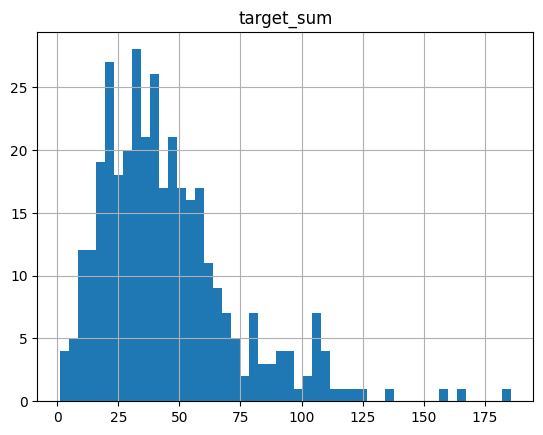

In [ ]:
drytotal_dict = {}
for image_path in image_path_list:
    # print(image_path)
    selected_df = df[df["image_path"] == image_path]
    target_sum = selected_df[selected_df["target_name"] == "Dry_Total_g"][
        "target"
    ].values[0]
    drytotal_dict[image_path] = target_sum
target_sum_df = pd.DataFrame.from_dict(
    drytotal_dict, orient="index", columns=["target_sum"]
)
target_sum_df.hist(bins=50)